In [37]:
!git clone https://github.com/fannymonori/TF-LapSRN.git

Cloning into 'TF-LapSRN'...
remote: Enumerating objects: 135, done.
remote: Total 135 (delta 0), reused 0 (delta 0), pack-reused 135
Receiving objects: 100% (135/135), 42.90 MiB | 25.25 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [38]:
!git clone https://github.com/Saafke/EDSR_Tensorflow.git

Cloning into 'EDSR_Tensorflow'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 149 (delta 1), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (149/149), 162.50 MiB | 9.86 MiB/s, done.
Resolving deltas: 100% (77/77), done.


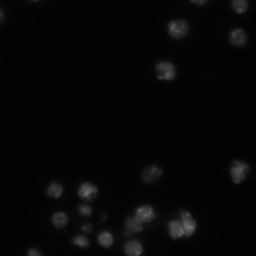

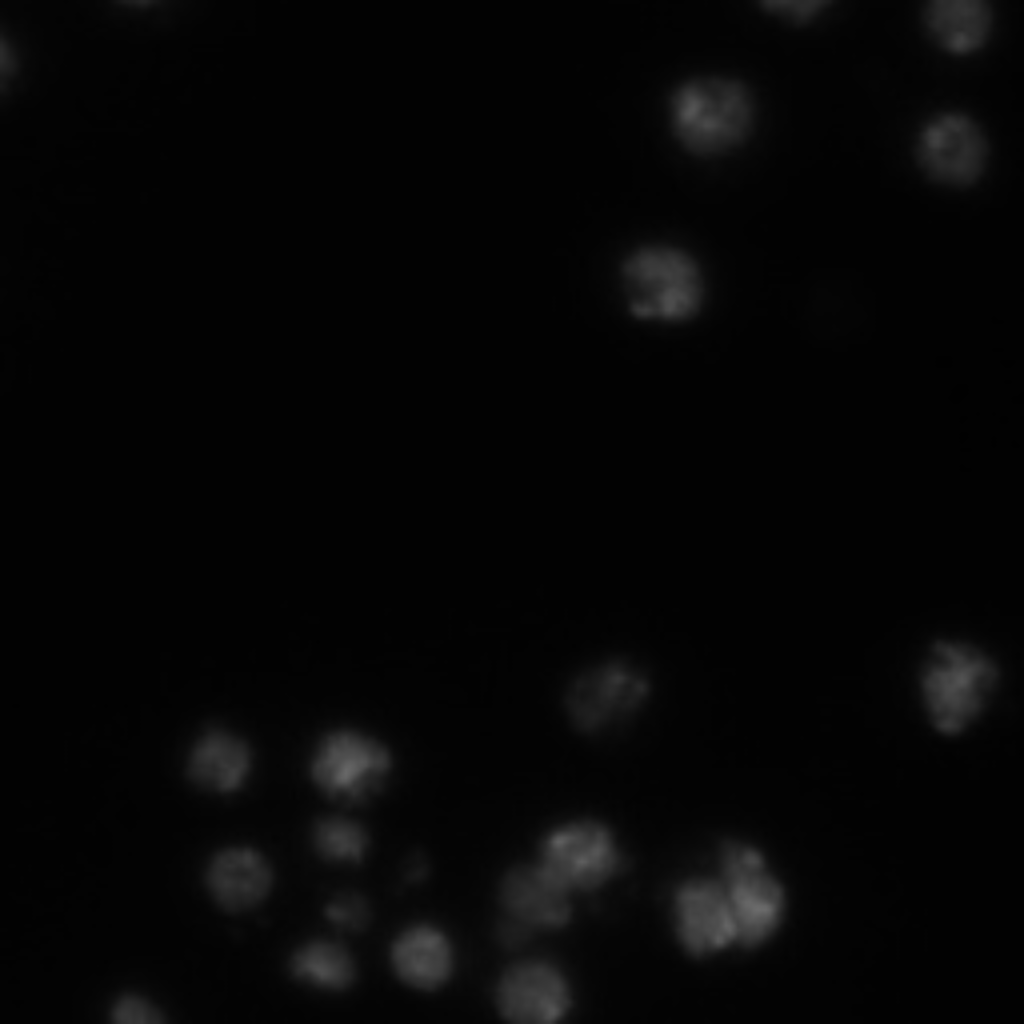

Time taken in seconds by lapsrn 5.95086932182312


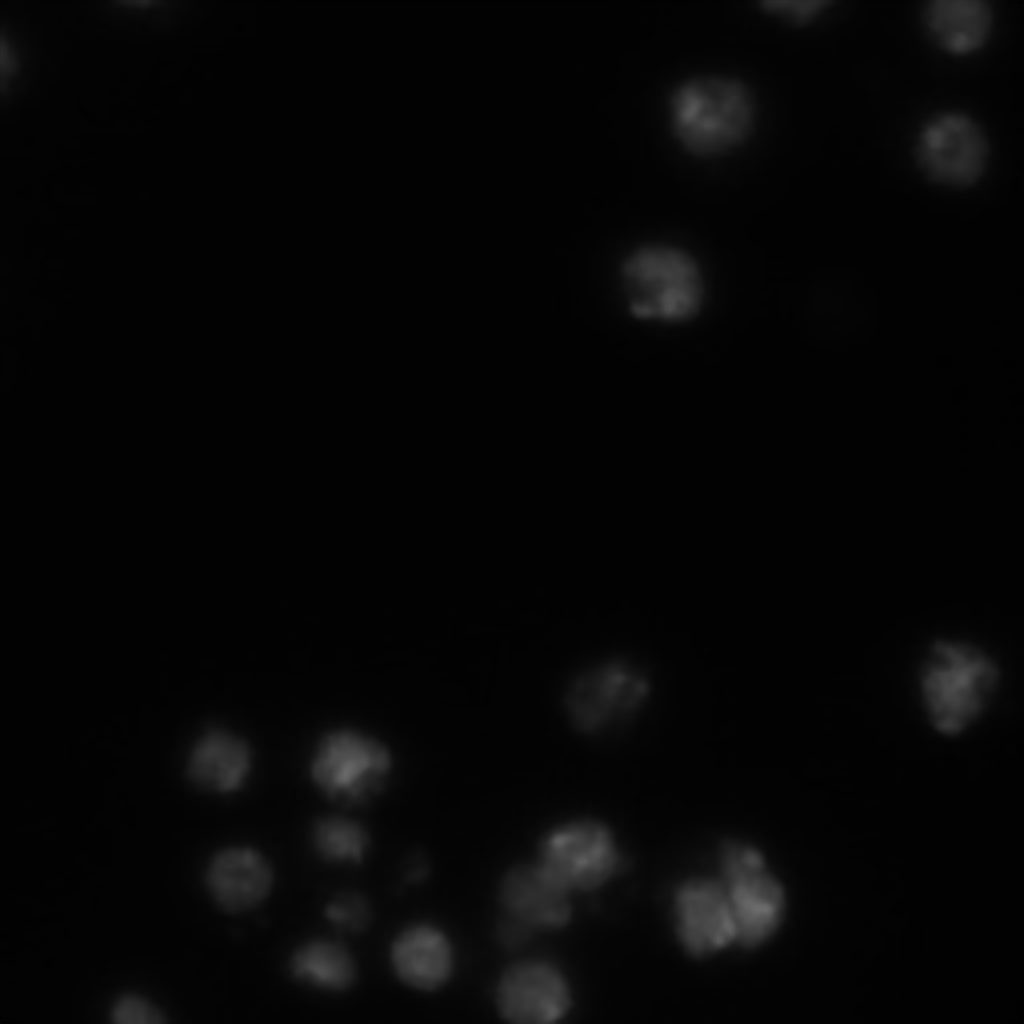

Time taken in seconds by edsr 84.4400782585144


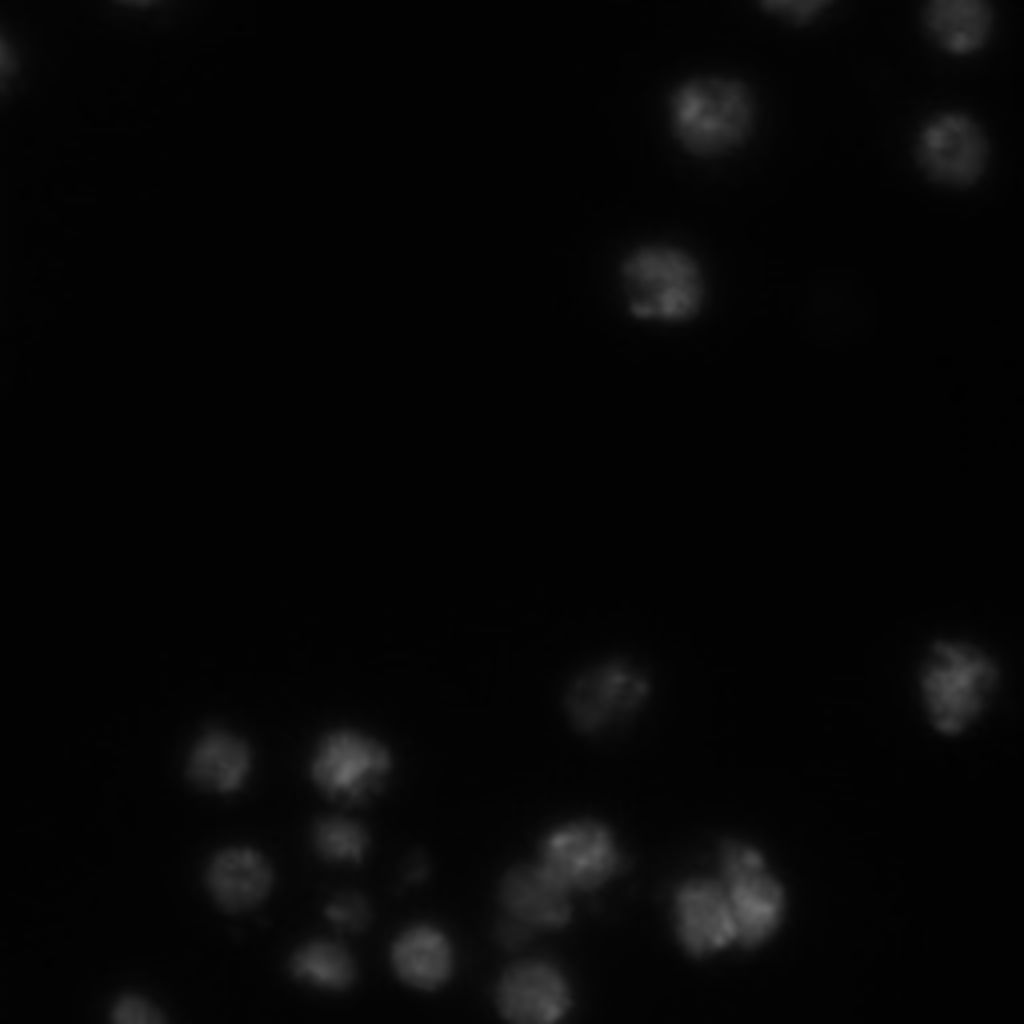

In [39]:
import cv2
import time
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/DatasetComp2018/DSB/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.jpg')
width = img.shape[1]
height = img.shape[0]
bicubic = cv2.resize(img,(width*4,height*4))
cv2_imshow(img)
cv2_imshow(bicubic)

super_res = cv2.dnn_superres.DnnSuperResImpl_create()

start = time.time()
super_res.readModel('/content/TF-LapSRN/export/LapSRN_x4.pb')
super_res.setModel('lapsrn',4)
lapsrn_image = super_res.upsample(img)
end = time.time()
print('Time taken in seconds by lapsrn', end-start)
cv2_imshow(lapsrn_image)
 
start = time.time()
super_res.readModel('/content/EDSR_Tensorflow/models/EDSR_x4.pb')
super_res.setModel('edsr',4)
edsr_image = super_res.upsample(img)
end = time.time()
print('Time taken in seconds by edsr', end-start)
cv2_imshow(edsr_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:

import cv2
import glob
import matplotlib.pyplot as plt
import time
from google.colab.patches import cv2_imshow
    
pathmasks="/content/drive/MyDrive/DatasetComp2018/DSB/masks/*.jpg"
pathimages="/content/drive/MyDrive/DatasetComp2018/DSB/images/*.jpg"


def save(image, path):
  cv2.imwrite(path, image)
  print("saved!")

def ISR(img, path):
  img=cv2.imread(f"{img}")
  width = img.shape[1]
  height = img.shape[0]
  super_res = cv2.dnn_superres.DnnSuperResImpl_create()
  start = time.time()
  super_res.readModel('/content/TF-LapSRN/export/LapSRN_x4.pb')
  super_res.setModel('lapsrn',4)
  lapsrn_image = super_res.upsample(img)
  end = time.time()
  print('Time taken in seconds by lapsrn', end-start)
  save(lapsrn_image, path)
  #cv2_imshow(lapsrn_image)
   

print(pathmasks)

images=[image for image in glob.glob(pathimages)]
masks=[image for image in glob.glob(pathmasks)]
#print(pathmasks)
#fig=plt.figure() 
for i in range(len(images)):
  name = images[i].split("/")[-1]
  save_path = f"/content/results/{name}"
  ISR(images[i], save_path)

  #ISR(images[i]) 

/content/drive/MyDrive/DatasetComp2018/DSB/masks/*.jpg
Time taken in seconds by lapsrn 5.918448209762573
saved!
Time taken in seconds by lapsrn 5.53636360168457
saved!


KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
